# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# pip install citipy

     ---------------------------------------- 0.0/675.6 kB ? eta -:--:--
     - ----------------------------------- 20.5/675.6 kB 330.3 kB/s eta 0:00:02
     --- --------------------------------- 61.4/675.6 kB 656.4 kB/s eta 0:00:01
     -------------------- ----------------- 368.6/675.6 kB 2.9 MB/s eta 0:00:01
     ----------------------------------- -- 634.9/675.6 kB 4.0 MB/s eta 0:00:01
     ------------------------------------ - 655.4/675.6 kB 2.9 MB/s eta 0:00:01
     -------------------------------------- 675.6/675.6 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for citipy: filename=citipy-0.0.6-py3-none-any.whl size=675977 sha256=b61e3e0be5b4b5ed7a6d23f818de7281e3a9f4c8224fb6d2e9dfbb4bdda2c5f5
  Stored in directory: c:\users\willp\appdata\local\pip\cache\wheels\e9\27\5f\7defd70aaec29af33fe5e2110843e14dcfc44cba710a0dd957
Successfully built citipy
Note: you may need to restart the kerne

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 626


In [6]:
cities[-1]

'alytus'

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [9]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=imperial"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | margaret river
Processing Record 2 of Set 1 | atafu village
Processing Record 3 of Set 1 | longyearbyen
Processing Record 4 of Set 1 | puerto natales
Processing Record 5 of Set 1 | iqaluit
Processing Record 6 of Set 1 | klyuchi
Processing Record 7 of Set 1 | howrah
Processing Record 8 of Set 1 | constantia
Processing Record 9 of Set 1 | port alfred
Processing Record 10 of Set 1 | ribeira grande
Processing Record 11 of Set 1 | port-aux-francais
Processing Record 12 of Set 1 | adamstown
Processing Record 13 of Set 1 | saipan
Processing Record 14 of Set 1 | isafjordur
Processing Record 15 of Set 1 | mustafakemalpasa
Processing Record 16 of Set 1 | hawaiian paradise park
Processing Record 17 of Set 1 | blackmans bay
Processing Record 18 of Set 1 | al jawf
Processing Record 19 of Set 1 | alofi
Processing Record 20 of Set 1 | princeville
Processing Record 21 of Set 1 | qapqal
City not found. Skipping..

In [10]:
city_data

[{'City': 'margaret river',
  'Lat': -33.95,
  'Lng': 115.0667,
  'Max Temp': 48.74,
  'Humidity': 89,
  'Cloudiness': 100,
  'Wind Speed': 7.81,
  'Country': 'AU',
  'Date': 1731004326},
 {'City': 'atafu village',
  'Lat': -8.5421,
  'Lng': -172.5159,
  'Max Temp': 83.71,
  'Humidity': 65,
  'Cloudiness': 6,
  'Wind Speed': 11.14,
  'Country': 'TK',
  'Date': 1731004327},
 {'City': 'longyearbyen',
  'Lat': 78.2186,
  'Lng': 15.6401,
  'Max Temp': 33.64,
  'Humidity': 75,
  'Cloudiness': 75,
  'Wind Speed': 13.8,
  'Country': 'SJ',
  'Date': 1731004413},
 {'City': 'puerto natales',
  'Lat': -51.7236,
  'Lng': -72.4875,
  'Max Temp': 46.85,
  'Humidity': 61,
  'Cloudiness': 100,
  'Wind Speed': 8.05,
  'Country': 'CL',
  'Date': 1731004415},
 {'City': 'iqaluit',
  'Lat': 63.7506,
  'Lng': -68.5145,
  'Max Temp': 19.13,
  'Humidity': 79,
  'Cloudiness': 75,
  'Wind Speed': 15.01,
  'Country': 'CA',
  'Date': 1731004213},
 {'City': 'klyuchi',
  'Lat': 52.2667,
  'Lng': 79.1667,
  'Max Tem

In [11]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          601
Lat           601
Lng           601
Max Temp      601
Humidity      601
Cloudiness    601
Wind Speed    601
Country       601
Date          601
dtype: int64

In [12]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,margaret river,-33.9500,115.0667,48.74,89,100,7.81,AU,1731004326
1,atafu village,-8.5421,-172.5159,83.71,65,6,11.14,TK,1731004327
2,longyearbyen,78.2186,15.6401,33.64,75,75,13.80,SJ,1731004413
3,puerto natales,-51.7236,-72.4875,46.85,61,100,8.05,CL,1731004415
4,iqaluit,63.7506,-68.5145,19.13,79,75,15.01,CA,1731004213


In [13]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [14]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,margaret river,-33.9500,115.0667,48.74,89,100,7.81,AU,1731004326
1,atafu village,-8.5421,-172.5159,83.71,65,6,11.14,TK,1731004327
2,longyearbyen,78.2186,15.6401,33.64,75,75,13.80,SJ,1731004413
3,puerto natales,-51.7236,-72.4875,46.85,61,100,8.05,CL,1731004415
4,iqaluit,63.7506,-68.5145,19.13,79,75,15.01,CA,1731004213


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

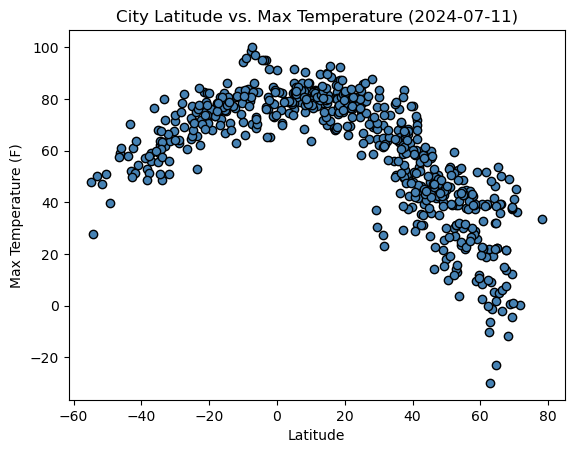

In [24]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", facecolors="steelblue", edgecolors="black")

# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature (2024-07-11)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

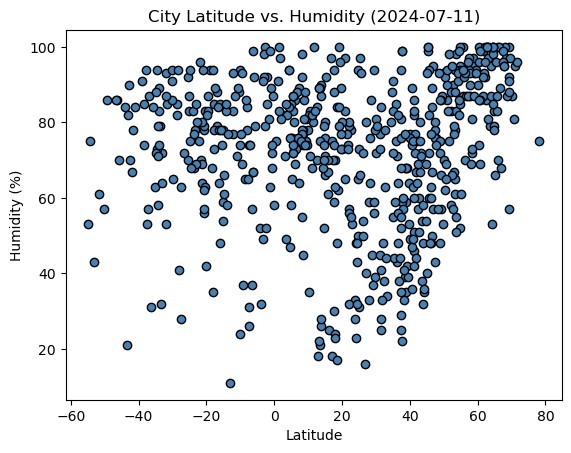

In [25]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", facecolors="steelblue", edgecolors="black")

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (2024-07-11)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

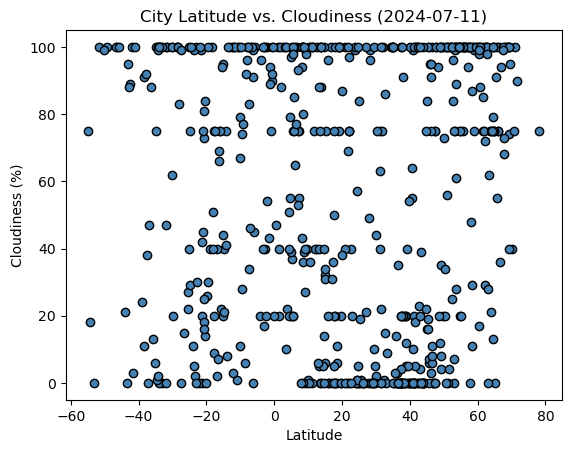

In [26]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", facecolors="steelblue", edgecolors="black")

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (2024-07-11)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

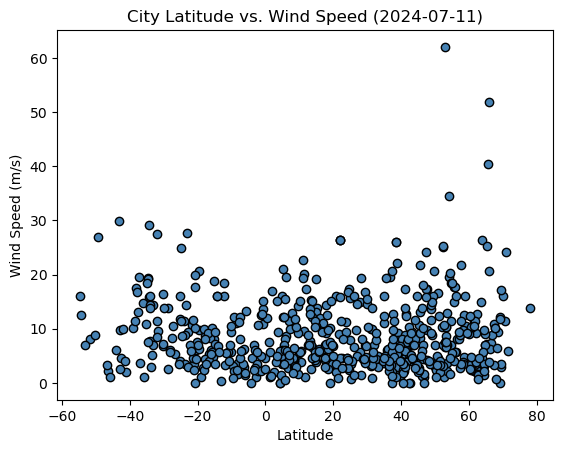

In [27]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", facecolors="steelblue", edgecolors="black")

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed (2024-07-11)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [54]:
# Define a function to create Linear Regression plots
def regressValues(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    return regress_values

In [30]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,longyearbyen,78.2186,15.6401,33.64,75,75,13.80,SJ,1731004413
4,iqaluit,63.7506,-68.5145,19.13,79,75,15.01,CA,1731004213
5,klyuchi,52.2667,79.1667,30.07,58,100,25.17,RU,1731004417
6,howrah,22.5892,88.3103,78.80,78,40,4.61,IN,1731004418
7,constantia,44.1833,28.6500,43.70,35,0,3.96,RO,1731004419


In [31]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,margaret river,-33.9500,115.0667,48.74,89,100,7.81,AU,1731004326
1,atafu village,-8.5421,-172.5159,83.71,65,6,11.14,TK,1731004327
3,puerto natales,-51.7236,-72.4875,46.85,61,100,8.05,CL,1731004415
8,port alfred,-33.5906,26.8910,63.18,79,100,3.00,ZA,1731004420
10,port-aux-francais,-49.3500,70.2167,39.54,86,100,26.91,TF,1731004422


###  Temperature vs. Latitude Linear Regression Plot

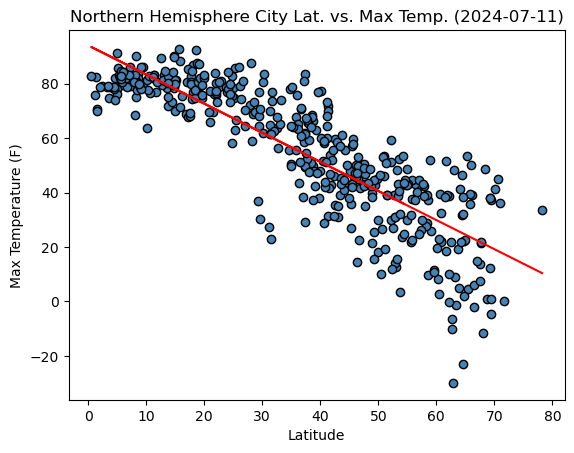

In [35]:
# Linear regression on Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], marker="o", facecolors="steelblue", edgecolors="black")
plt.plot(northern_hemi_df["Lat"], regressValues(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"]),"r-")

# Incorporate the other graph properties
plt.title('Northern Hemisphere City Lat. vs. Max Temp. (2024-07-11)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.show()

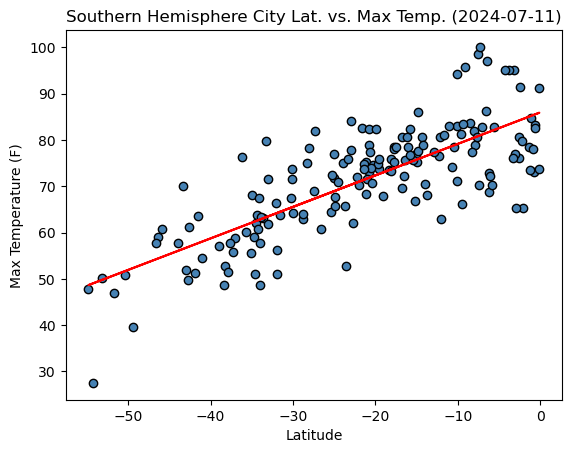

In [36]:
# Linear regression on Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], marker="o", facecolors="steelblue", edgecolors="black")
plt.plot(southern_hemi_df["Lat"], regressValues(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"]),"r-")

# Incorporate the other graph properties
plt.title('Southern Hemisphere City Lat. vs. Max Temp. (2024-07-11)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.show()

**Discussion about the linear relationship:** There is a strong correlation between latitude and max temperature. The max temperature approaches 90 degrees the closer to latitude 0 in both the northern and southern hemispheres.

### Humidity vs. Latitude Linear Regression Plot

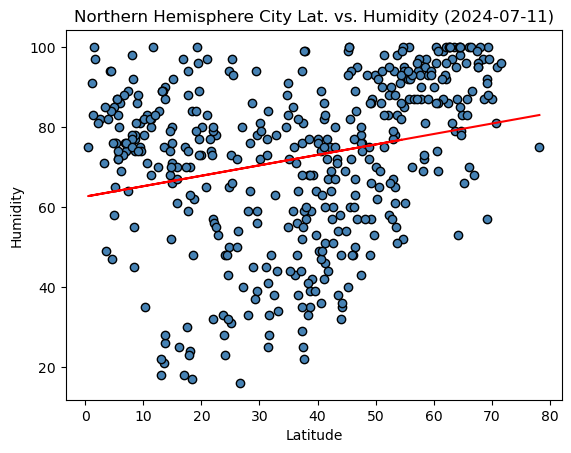

In [37]:
# Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], marker="o", facecolors="steelblue", edgecolors="black")
plt.plot(northern_hemi_df["Lat"], regressValues(northern_hemi_df["Lat"], northern_hemi_df["Humidity"]),"r-")

# Incorporate the other graph properties
plt.title('Northern Hemisphere City Lat. vs. Humidity (2024-07-11)')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

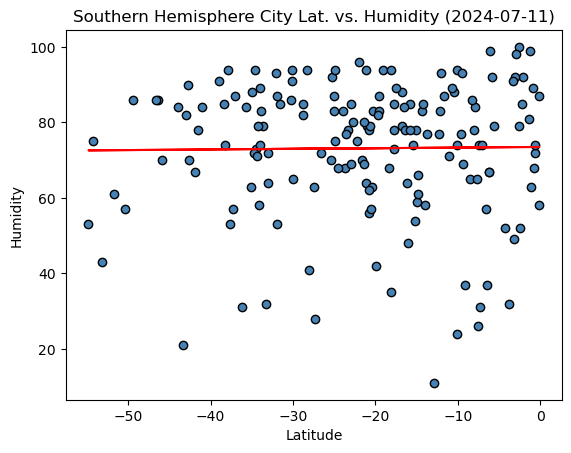

In [38]:
# Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], marker="o", facecolors="steelblue", edgecolors="black")
plt.plot(southern_hemi_df["Lat"], regressValues(southern_hemi_df["Lat"], southern_hemi_df["Humidity"]),"r-")

# Incorporate the other graph properties
plt.title('Southern Hemisphere City Lat. vs. Humidity (2024-07-11)')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

**Discussion about the linear relationship:** There isn't a strong correlation between latitude and humidity. There is a slightly higher positive relationship in the northern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

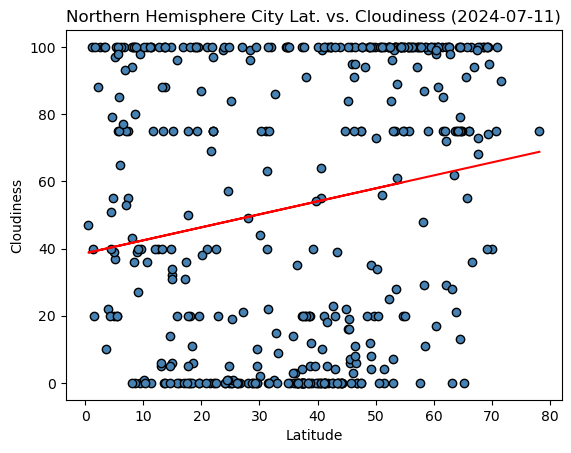

In [41]:
# Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], marker="o", facecolors="steelblue", edgecolors="black")
plt.plot(northern_hemi_df["Lat"], regressValues(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"]),"r-")

# Incorporate the other graph properties
plt.title('Northern Hemisphere City Lat. vs. Cloudiness (2024-07-11)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

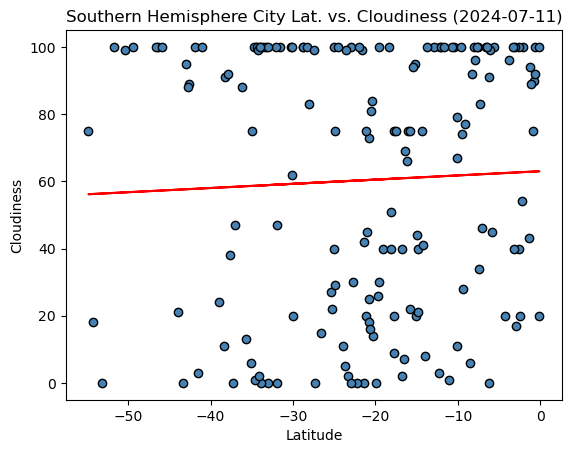

In [42]:
# Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], marker="o", facecolors="steelblue", edgecolors="black")
plt.plot(southern_hemi_df["Lat"], regressValues(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"]),"r-")

# Incorporate the other graph properties
plt.title('Southern Hemisphere City Lat. vs. Cloudiness (2024-07-11)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

**Discussion about the linear relationship:** There isn't a strong correlation between latitude and cloudiness. There is a slightly positive correlation in the northern hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

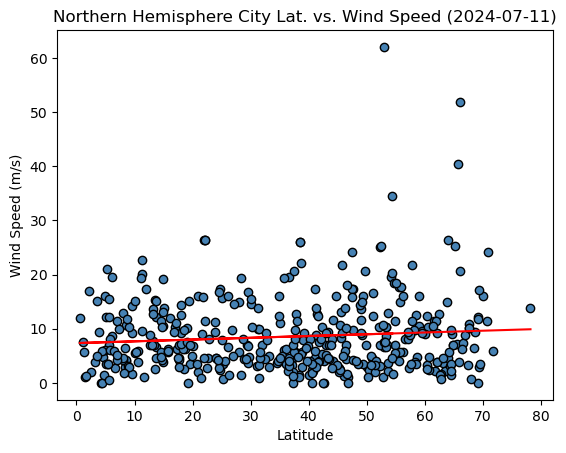

In [43]:
# Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], marker="o", facecolors="steelblue", edgecolors="black")
plt.plot(northern_hemi_df["Lat"], regressValues(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"]),"r-")

# Incorporate the other graph properties
plt.title('Northern Hemisphere City Lat. vs. Wind Speed (2024-07-11)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.show()

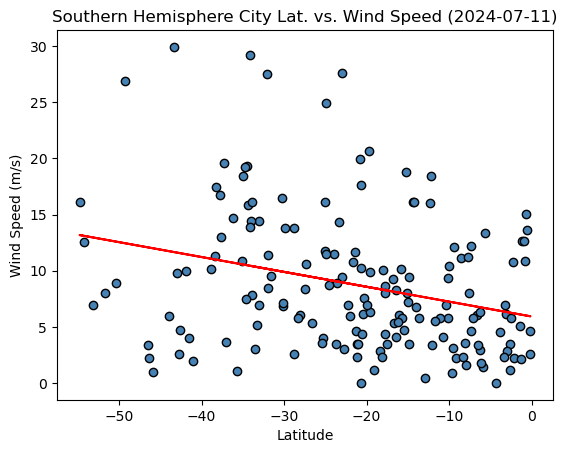

In [53]:
# Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], marker="o", facecolors="steelblue", edgecolors="black")
plt.plot(southern_hemi_df["Lat"], regressValues(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"]),"r-")

# Incorporate the other graph properties
plt.title('Southern Hemisphere City Lat. vs. Wind Speed (2024-07-11)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.show()

**Discussion about the linear relationship:** There is a slight negative correlation between latitude and wind speed, but only in the southern hemisphere.